In [1]:
import pandas as pd
import datetime
from datetime import timedelta, date

In [2]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

Set period with the starting and ending day, Aug 1, 2019 to today as the example here

In [3]:
start_date = date(2019, 8, 1)
end_date = datetime.date.today()

In [4]:
df = pd.DataFrame()
for single_date in daterange(start_date, end_date):
    dfs = pd.read_html(f'https://www.xe.com/currencytables/?from=USD&date={single_date.strftime("%Y-%m-%d")}')[0]
    dfs['Date'] = single_date.strftime("%Y-%m-%d")
    df = df.append(dfs)
df.columns = ['Currency code', 'Currency name', 'Units per USD', 'USD per Unit', 'Date']

In [5]:
df.head()

,Currency code,Currency name,Units per USD,USD per Unit,Date
0,USD,US Dollar,1.000000,1.000000,2019-08-01
1,EUR,Euro,0.904032,1.106156,2019-08-01
2,GBP,British Pound,0.823448,1.214406,2019-08-01
3,INR,Indian Rupee,68.951964,0.014503,2019-08-01
4,AUD,Australian Dollar,1.457967,0.685887,2019-08-01


Choose Euro as sample currency

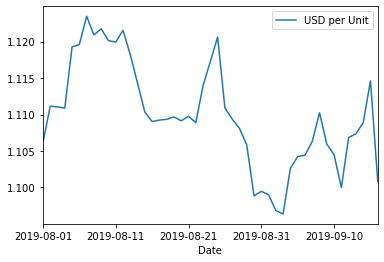

In [7]:
df[df['Currency code'] == 'EUR'].plot(x='Date',y='USD per Unit',kind = 'line')